In [1]:
using MatrixNetworks
using Distributions
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using EllipsoidalGraphEmbedding
using Random
using Arpack
using Plots, LaTeXStrings

using Graphs
using GraphPlot

using IterTools
using Statistics
using Measures


### LFR toy benchmark

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 21 iterations


  0.092804 seconds (23.08 k allocations: 29.799 MiB, 26.83% gc time, 35.64% compilation time)


 -------------- Clustering ------- 
dimension of embedding used for clustering: 10
Number of updates: 

8
Modularity: 0.5822748714758875
Number of communities: 5
 -------------------------------------------- 


The first 5 squared singular values divided by N : 


[0.5006466601805422, 0.33897606426474747, 0.16023018027862945, 6.951099057174826e-5, 2.0442295778092165e-5]
 -------------------------------------------- 
  1.266679 seconds (1.05 M allocations: 332.882 MiB, 8.34% gc time, 3.74% compilation time)


NMI with ground truth: 0.9870932840544911


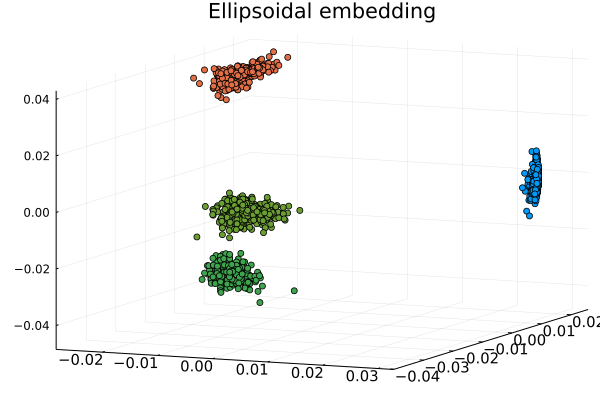

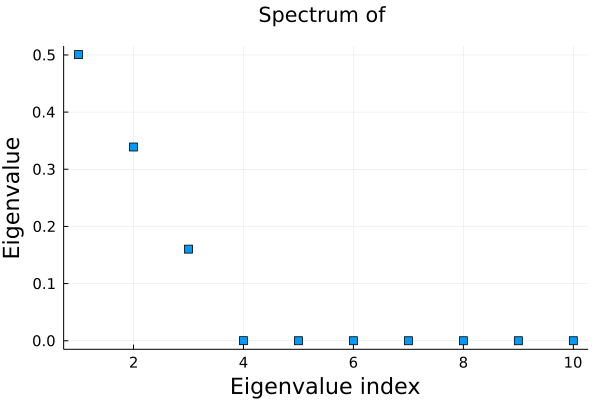

ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error
ERROR: syntax error


In [2]:
set = "toy_1"#"toy_2"

com_data = readdlm("Data/LFR_data/"*set*"_communities.txt");
adj = readdlm("Data/LFR_data/"*set*"_edgeList.txt");
adj = adj .+ 1 #indices start from 1

# converting to int array
community_true = com_data;
community_true = convert(Array{Int64},community_true);

N = length(community_true);

# construct adjacency matrix
n_edge2 = size(adj)[1];
A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N)
A = A + A'
# largest connected component
A,_ = largest_component(A);
adj = 0; # clear memory

# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
d0 = 10

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 50; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community,sigma =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, d0);

# normalized multual information
nmi = mutualinfo(community_true,community)
println("NMI with ground truth: ", nmi)
# beware run twice to get timings without compilation time

p1 = Plots.plot(x_embed[1,:],x_embed[2,:],x_embed[3,:],seriestype=:scatter, color = community_true, legend = false,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15,title= "Ellipsoidal embedding")
savefig("figures/LFR_"*set*"_embedding.pdf")
display(p1)

p2 = Plots.plot(1:length(sigma),sigma.^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
Plots.xlabel!("Eigenvalue index")
Plots.ylabel!("Eigenvalue")
Plots.title!(L"Spectrum of 
")
savefig("figures/LFR_"*set*"_spectrum.pdf")
display(p2)

### Power EU graph

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 4 iterations
  0.006824 seconds (205 allocations: 10.625 MiB)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 20
Number of updates: 

8
Modularity: -0.1108514871570799
Number of communities: 11
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.8673027383646845, 0.09145834733461472, 0.004597424585395459, 0.004147560080267746, 0.0037029530983019735]
 -------------------------------------------- 
  0.795820 seconds (599.98 k allocations: 399.042 MiB, 11.51% gc time)


┌ Warning: Indices Base.OneTo(2000) of attribute `seriescolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `linecolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `fillcolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `markercolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132


┌ Warning: Indices Base.OneTo(2000) of attribute `seriescolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `linecolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `fillcolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `markercolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `seriescolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `linecolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils

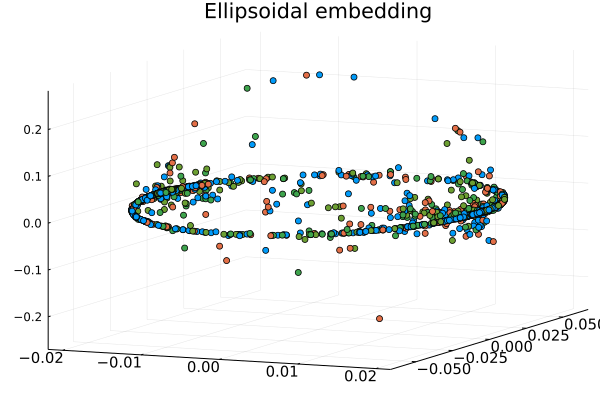

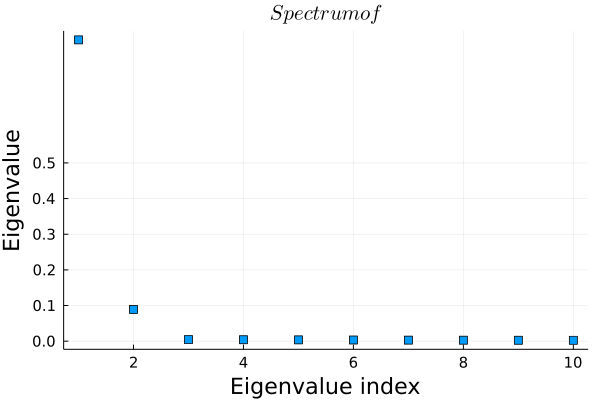

┌ Warning: Indices Base.OneTo(2000) of attribute `seriescolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `linecolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `fillcolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132
┌ Warning: Indices Base.OneTo(2000) of attribute `markercolor` does not match data indices 1:2712.
└ @ Plots /Users/mfanuel/.julia/packages/Plots/PomtQ/src/utils.jl:132


In [10]:
# Loading data
m = readdlm("Data/PowerEU/ElistPowerEU.txt");
dim = size(m,1);

M_int = zeros(Int64,dim,2);
for i =1:dim
	for j=1:2
		M_int[i,j] = Int64(m[i,j]);
	end
end

N = maximum([maximum(M_int[:,1]),maximum(M_int[:,2])]);

A0 =spzeros(N,N);
A0 = sparse(M_int[:,1],M_int[:,2],vec(ones(Int64,dim,1)),N,N);
A0 = A0+A0';
A,p = largest_component(A0);
A0=0;p=0;m =0;

# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
d0 = 20;

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 50;

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
descriptor = "Laplacian" # "Modularity" #

x_embed,community,singular =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, d0, descriptor)
# beware run twice to get timings without compilation time

p1 = Plots.plot(x_embed[1,:],x_embed[2,:],x_embed[3,:],seriestype=:scatter, color = community_true, legend = false,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15,title= "Ellipsoidal embedding")
savefig("figures/PowerEU_ellipsoidal_embedding.pdf")
display(p1)

p2 = Plots.plot(1:10,singular[1:10].^2/N,seriestype=:scatter, legend = false,yticks = 0:0.1:0.5,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
Plots.xlabel!("Eigenvalue index")
Plots.ylabel!("Eigenvalue")
Plots.title!(L"Spectrum of ")
savefig("figures/PowerEU_ellipsoidal_spectrum.pdf")
display(p2)


In [ ]:
using CairoMakie
using GLMakie
using GraphMakie: graphplot
using GraphMakie: graphplot!

g = Graph(A)
x = x_embed'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2],x[:, 3]))
end

f, ax, p = graphplot(g; layout=mylayout,edge_color=:blue,node_size=1,edge_width=1)    
f

### Spectral embedding

In [ ]:
d = sum(A,dims=2)
D = Diagonal(1 ./ vec(sqrt.(d)))
p = sqrt.(d/sum(d))

L = D * A * D - p * p'

λ, V = eigs(L, nev = 10, which=:LR)
x_embed_spectral = (V[:,1:3])'

p1 = Plots.plot(x_embed_spectral[1,:],x_embed_spectral[2,:],x_embed_spectral[3,:],seriestype=:scatter, color = community_true, legend = false,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15,title= "Ellipsoidal embedding")
savefig("figures/PowerEU_Laplacian_embedding.pdf")
display(p1)

p2 = Plots.plot(1:10,λ, legend = false ,seriestype=:scatter,xtickfontsize=10,ytickfontsize=10, xguidefontsize=15, yguidefontsize=15, marker=:square)
Plots.xlabel!("Eigenvalue index")
Plots.ylabel!("Eigenvalue")
Plots.title!(L"Spectrum of ")
savefig("figures/PowerEU_Laplacian_spectrum.pdf")
display(p2)

g = Graph(A)
x = x_embed_spectral'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2],x[:, 3]))
end

f, ax, p = graphplot(g; layout=mylayout,edge_color=:blue,node_size=1,edge_width=1)    
f

In [ ]:
### Toy example

In [ ]:


A = zeros(Int64,12,12)
A[1,2] = 1
A[1,4] = 1
A[2,3] = 1
A[3,4] = 1

A[5,6] = 1
A[5,8] = 1
A[6,7] = 1
A[7,8] = 1

A[9,10] = 1
A[9,12] = 1
A[10,11] = 1
A[11,12] = 1

A[4,5] = 1
A[8,9] = 1
A[12,1] = 1

A = sparse(A + A')

N = size(A,1)
n_it_PPM = 1000
n_clusters = 10
n_it_vec_part = 100
n_updates = 100
shape = "Spherical"
d0 = 2

community = zeros(Int64,N,1);
x_embed,community,sigma =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, d0)

g = Graph(A)
x = x_embed'
function mylayout(g)
    # create iterator going over x-coord and y-coord 
    return Point.(zip(x[:, 1], x[:, 2]))
end

#f, ax, p = graphplot(g)
lab = vec(["1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12"])
f, ax, p = graphplot(g; layout=mylayout,nlabels=lab,nlabels_distance=2,edge_color=:blue)    

hidedecorations!(ax); hidespines!(ax)
ax.aspect = DataAspect()
f
     
